# Initial value problem for ODEs

# I. Euler's method for a first order ODE

Consider a first order equation

$$
\frac{d u}{d t} = \lambda u
$$

with the initial condition $u(t=0) = u_0$.

Here is a simple illustration of solving this equation with the explicit Euler method.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

In [2]:
def euler_solve(lam, u0, T, dt):
    """Solve $du/dt = \lambda u$ on $0 < t < T$ with $u(t=0) = u0$ via an explicit Euler method."""
    num_steps = int(T/dt)
    tt = np.arange(num_steps+1)*dt
    y = np.empty(num_steps+1)
    y[0] = u0
    for k in range(num_steps):
        y[k+1] = y[k] + dt*lam*y[k]
    return tt, y

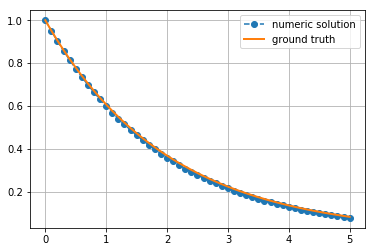

In [3]:
lam = -0.5
tt, y = euler_solve(lam, u0=1.0, T=5, dt=0.1)
plt.plot(tt, y, 'o--', label='numeric solution')
plt.plot(tt, np.exp(lam*tt), '-', lw=2, label='ground truth')
plt.legend(loc='best')
plt.grid(True)


### Test I.1

Test the function above for varying step size $\tau$ (in the code it's `dt`), including $|\lambda| \tau > 1$? 

(10% of the grade)

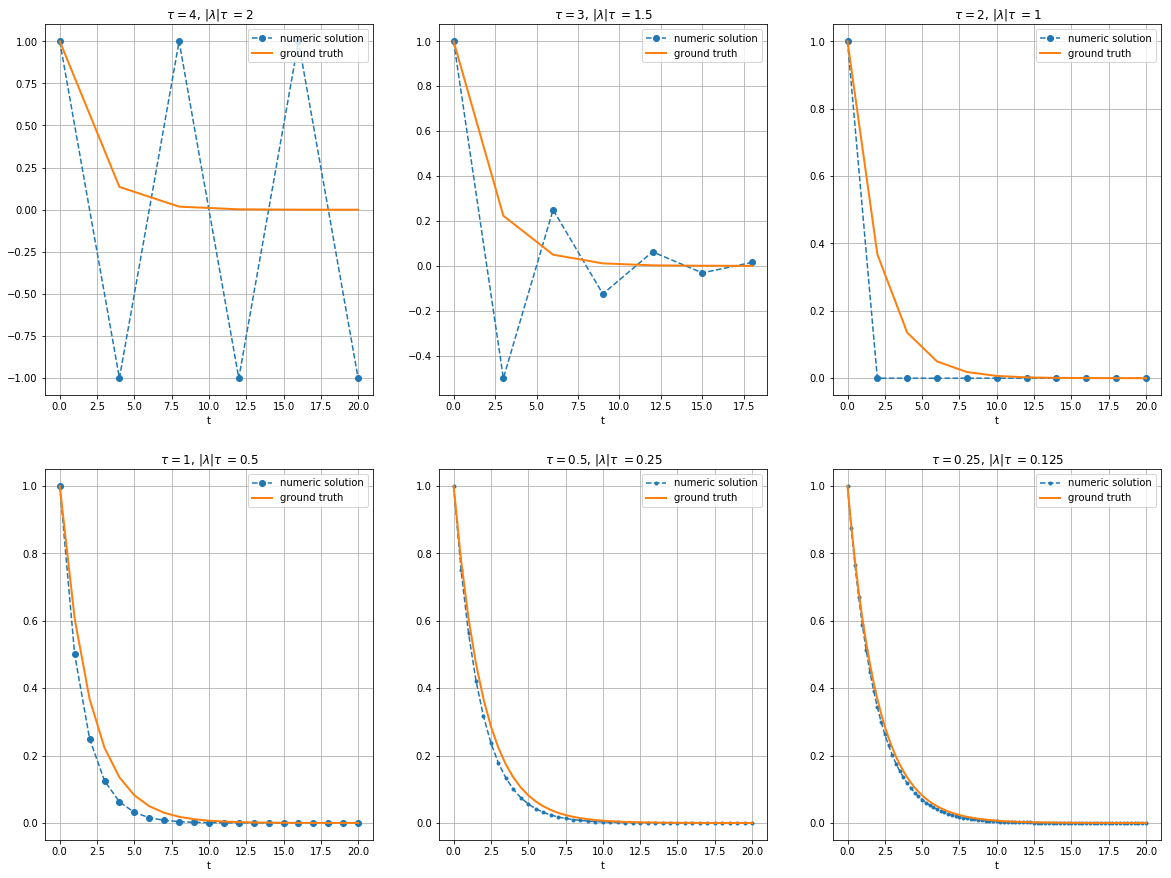

In [27]:
lam = -0.5
plt.figure(figsize=(20, 15))

plt.subplot(231)
tt, y = euler_solve(lam, u0=1.0, T=20, dt=4)
plt.title(' $\\tau = 4$, $|\lambda\|\\tau\ = 2$ ')
plt.plot(tt, y, 'o--', label='numeric solution')
plt.plot(tt, np.exp(lam*tt), '-', lw=2, label='ground truth')
plt.legend(loc='best')
plt.xlabel('t')
plt.grid(True)


plt.subplot(232)
tt, y = euler_solve(lam, u0=1.0, T=20, dt=3)
plt.title(' $\\tau = 3$, $|\lambda\|\\tau\ = 1.5$ ')
plt.plot(tt, y, 'o--', label='numeric solution')
plt.plot(tt, np.exp(lam*tt), '-', lw=2, label='ground truth')
plt.legend(loc='best')
plt.xlabel('t')
plt.grid(True)

plt.subplot(233)
tt, y = euler_solve(lam, u0=1.0, T=20, dt=2)
plt.title(' $\\tau = 2$, $|\lambda\|\\tau\ = 1$ ')
plt.plot(tt, y, 'o--', label='numeric solution')
plt.plot(tt, np.exp(lam*tt), '-', lw=2, label='ground truth')
plt.legend(loc='best')
plt.xlabel('t')
plt.grid(True)

plt.subplot(234)
tt, y = euler_solve(lam, u0=1.0, T=20, dt=1)
plt.title(' $\\tau = 1$, $|\lambda\|\\tau\ = 0.5$ ')
plt.plot(tt, y, 'o--', label='numeric solution')
plt.plot(tt, np.exp(lam*tt), '-', lw=2, label='ground truth')
plt.legend(loc='best')
plt.xlabel('t')
plt.grid(True)

plt.subplot(235)
tt, y = euler_solve(lam, u0=1.0, T=20, dt=0.5)
plt.title(' $\\tau = 0.5$, $|\lambda\|\\tau\ = 0.25$ ')
plt.plot(tt, y, '.--', label='numeric solution')
plt.plot(tt, np.exp(lam*tt), '-', lw=2, label='ground truth')
plt.legend(loc='best')
plt.xlabel('t')
plt.grid(True)

plt.subplot(236)
tt, y = euler_solve(lam, u0=1.0, T=20, dt=0.25)
plt.title(' $\\tau = 0.25$, $|\lambda\|\\tau\ = 0.125$ ')
plt.plot(tt, y, '.--', label='numeric solution')
plt.plot(tt, np.exp(lam*tt), '-', lw=2, label='ground truth')
plt.legend(loc='best')
plt.xlabel('t')
plt.grid(True)


Из теории следует, что численное решение (явная схема Эйлера) должно быть устойчиво при $0<\tau<\frac{2}{|\lambda|}$. Из графиков видно, что так и происходит. Ведь для первого графика $\tau\ = 4$,$\frac{2}{|\lambda|}\ = 4 $,  то есть $\tau\ = \frac{2}{|\lambda|}\ $\, то есть численное решение не должно устойчиво сходиться к аналитическому решению. Для остальных комбинаций параметров условие устойчивой сходимости выполнено. Всё, сказанное выше, подтвержается соответствующими графиками.  

### Test I.2

Implement a function for solving the same equation, $du/dt = \lambda u$ using the implicit Euler scheme. Compare the behavior of the implicit and explicit Euler schemes. Discuss.

(10% of the grade)

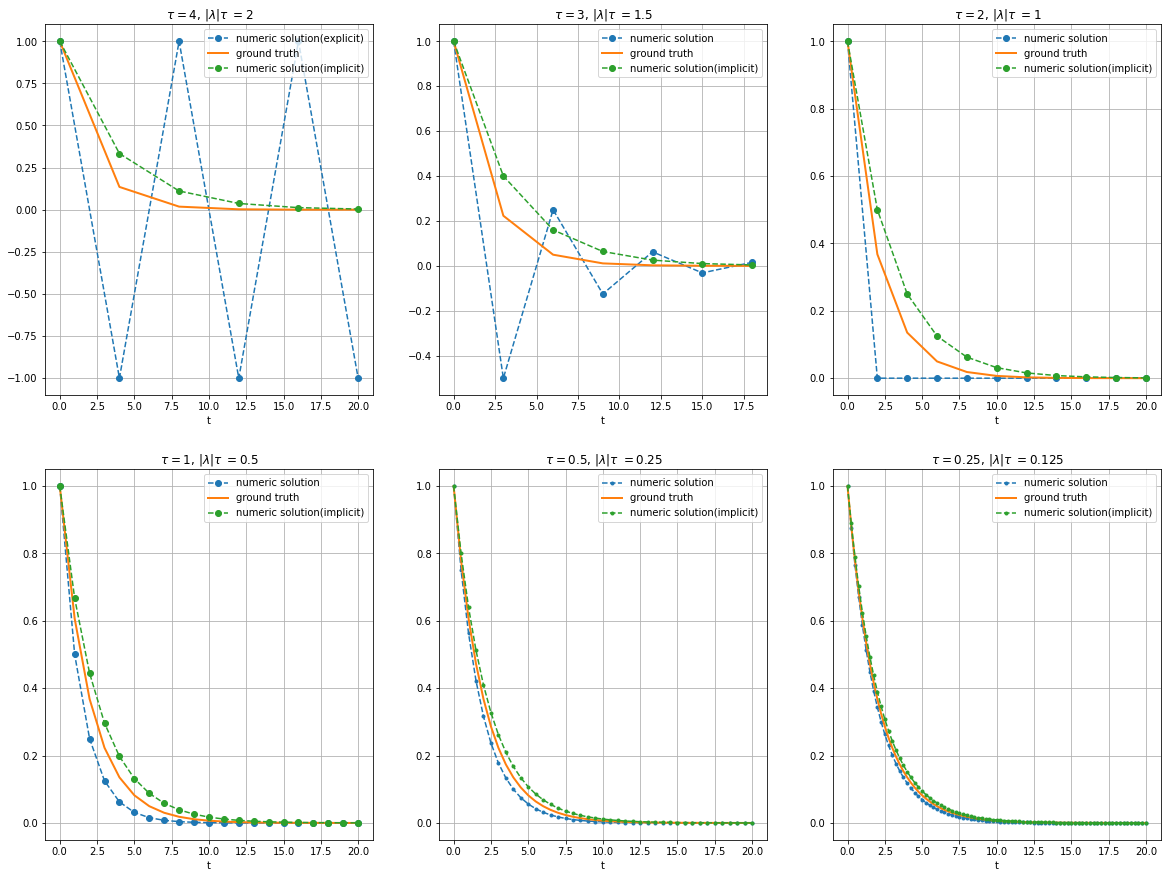

In [28]:
# Теперь правая часть уравнения олжна вычисляться от y_n+1, в остальном схема остаётся прежней

def implicit_euler_solve(lam, u0, T, dt):

    num_steps = int(T/dt)
    tt = np.arange(num_steps+1)*dt
    y = np.empty(num_steps+1)
    y[0] = u0
    for k in range(num_steps):
        y[k+1] = y[k] /(1 - dt*lam)
    return tt, y
# Теперь построим решения двух схем на графиках из первого пункта
# (код из первого пункта + одна строчка для нового графика )

lam = -0.5
plt.figure(figsize=(20, 15))

plt.subplot(231)
tt, y = euler_solve(lam, u0=1.0, T=20, dt=4)
ttt, yy = implicit_euler_solve(lam, u0=1.0, T=20, dt=4)
plt.title(' $\\tau = 4$, $|\lambda\|\\tau\ = 2$ ')
plt.plot(tt, y, 'o--', label='numeric solution(explicit)')
plt.plot(tt, np.exp(lam*tt), '-', lw=2, label='ground truth')
plt.plot(ttt, yy, 'o--', label='numeric solution(implicit)')
plt.legend(loc='best')
plt.xlabel('t')
plt.grid(True)


plt.subplot(232)
tt, y = euler_solve(lam, u0=1.0, T=20, dt=3)
ttt, yy = implicit_euler_solve(lam, u0=1.0, T=20, dt=3)
plt.title(' $\\tau = 3$, $|\lambda\|\\tau\ = 1.5$ ')
plt.plot(tt, y, 'o--', label='numeric solution')
plt.plot(tt, np.exp(lam*tt), '-', lw=2, label='ground truth')
plt.plot(ttt, yy, 'o--', label='numeric solution(implicit)')
plt.legend(loc='best')
plt.xlabel('t')
plt.grid(True)

plt.subplot(233)
tt, y = euler_solve(lam, u0=1.0, T=20, dt=2)
ttt, yy = implicit_euler_solve(lam, u0=1.0, T=20, dt=2)
plt.title(' $\\tau = 2$, $|\lambda\|\\tau\ = 1$ ')
plt.plot(tt, y, 'o--', label='numeric solution')
plt.plot(tt, np.exp(lam*tt), '-', lw=2, label='ground truth')
plt.plot(ttt, yy, 'o--', label='numeric solution(implicit)')
plt.legend(loc='best')
plt.xlabel('t')
plt.grid(True)

plt.subplot(234)
tt, y = euler_solve(lam, u0=1.0, T=20, dt=1)
ttt, yy = implicit_euler_solve(lam, u0=1.0, T=20, dt=1)
plt.title(' $\\tau = 1$, $|\lambda\|\\tau\ = 0.5$ ')
plt.plot(tt, y, 'o--', label='numeric solution')
plt.plot(tt, np.exp(lam*tt), '-', lw=2, label='ground truth')
plt.plot(ttt, yy, 'o--', label='numeric solution(implicit)')
plt.legend(loc='best')
plt.xlabel('t')
plt.grid(True)

plt.subplot(235)
tt, y = euler_solve(lam, u0=1.0, T=20, dt=0.5)
ttt, yy = implicit_euler_solve(lam, u0=1.0, T=20, dt=0.5)
plt.title(' $\\tau = 0.5$, $|\lambda\|\\tau\ = 0.25$ ')
plt.plot(tt, y, '.--', label='numeric solution')
plt.plot(tt, np.exp(lam*tt), '-', lw=2, label='ground truth')
plt.plot(ttt, yy, '.--', label='numeric solution(implicit)')
plt.legend(loc='best')
plt.xlabel('t')
plt.grid(True)

plt.subplot(236)
tt, y = euler_solve(lam, u0=1.0, T=20, dt=0.25)
ttt, yy = implicit_euler_solve(lam, u0=1.0, T=20, dt=0.25)
plt.title(' $\\tau = 0.25$, $|\lambda\|\\tau\ = 0.125$ ')
plt.plot(tt, y, '.--', label='numeric solution')
plt.plot(tt, np.exp(lam*tt), '-', lw=2, label='ground truth')
plt.plot(ttt, yy, '.--', label='numeric solution(implicit)')
plt.legend(loc='best')
plt.xlabel('t')
plt.grid(True)


Неявная схема Эйлера имеет другое условие сходимости, а именно численное решение устойчиво при условии $\tau>0$ и $\lambda<0$. То есть решение должно быть устойчиво при всех тестовых комбинациях параметров из предыдущего теста. Так и произошло, это подтвержается графиками (для сравнения двух схем постоены оба численных решения).

Кроме того, неявная схема Эйлера чуть лучше приближает точное решение. Чтобы нагляднее показать это, построим график зависимости модуля отклонения  численного решения от точного решения для обеих схем.

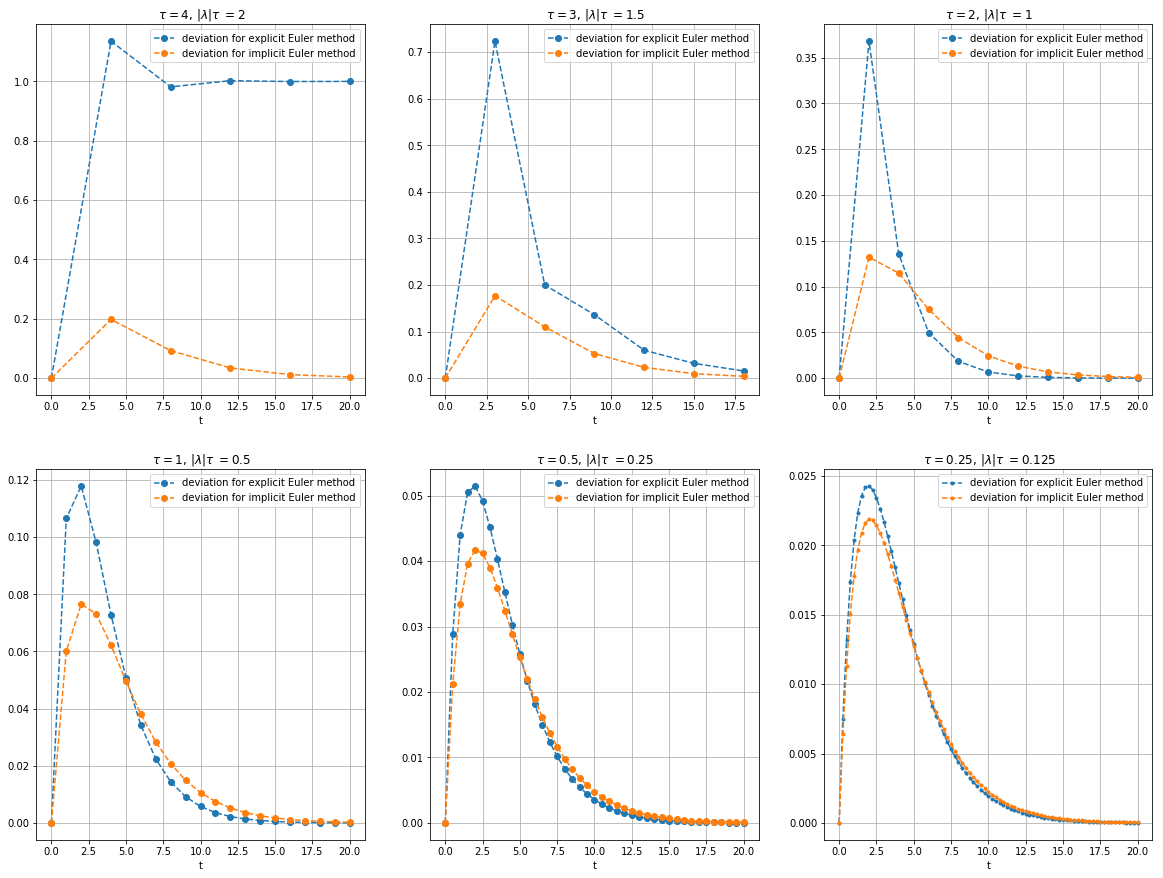

In [29]:
lam = -0.5
plt.figure(figsize=(20, 15))

plt.subplot(231)
tt, y = euler_solve(lam, u0=1.0, T=20, dt=4)
ttt, yy = implicit_euler_solve(lam, u0=1.0, T=20, dt=4)
delt_imp = abs(np.exp(lam*tt) - yy)
delt = abs(np.exp(lam*tt) - y)
plt.title(' $\\tau = 4$, $|\lambda\|\\tau\ = 2$ ')
plt.plot(tt, delt, 'o--', label='deviation for explicit Euler method')
plt.plot(ttt, delt_imp, 'o--', label='deviation for implicit Euler method')
plt.legend(loc='best')
plt.xlabel('t')
plt.grid(True)


plt.subplot(232)
tt, y = euler_solve(lam, u0=1.0, T=20, dt=3)
ttt, yy = implicit_euler_solve(lam, u0=1.0, T=20, dt=3)
delt_imp = abs(np.exp(lam*tt) - yy)
delt = abs(np.exp(lam*tt) - y)
plt.title(' $\\tau = 3$, $|\lambda\|\\tau\ = 1.5$ ')
plt.plot(tt, delt, 'o--', label='deviation for explicit Euler method')
plt.plot(ttt, delt_imp, 'o--', label='deviation for implicit Euler method')
plt.legend(loc='best')
plt.xlabel('t')
plt.grid(True)

plt.subplot(233)
tt, y = euler_solve(lam, u0=1.0, T=20, dt=2)
ttt, yy = implicit_euler_solve(lam, u0=1.0, T=20, dt=2)
delt_imp = abs(np.exp(lam*tt) - yy)
delt = abs(np.exp(lam*tt) - y)
plt.title(' $\\tau = 2$, $|\lambda\|\\tau\ = 1$ ')
plt.plot(tt, delt, 'o--', label='deviation for explicit Euler method')
plt.plot(ttt, delt_imp, 'o--', label='deviation for implicit Euler method')
plt.legend(loc='best')
plt.xlabel('t')
plt.grid(True)

plt.subplot(234)
tt, y = euler_solve(lam, u0=1.0, T=20, dt=1)
ttt, yy = implicit_euler_solve(lam, u0=1.0, T=20, dt=1)
delt_imp = abs(np.exp(lam*tt) - yy)
delt = abs(np.exp(lam*tt) - y)
plt.title(' $\\tau = 1$, $|\lambda\|\\tau\ = 0.5$ ')
plt.plot(tt, delt, 'o--', label='deviation for explicit Euler method')
plt.plot(ttt, delt_imp, 'o--', label='deviation for implicit Euler method')
plt.legend(loc='best')
plt.xlabel('t')
plt.grid(True)

plt.subplot(235)
tt, y = euler_solve(lam, u0=1.0, T=20, dt=0.5)
ttt, yy = implicit_euler_solve(lam, u0=1.0, T=20, dt=0.5)
delt_imp = abs(np.exp(lam*tt) - yy)
delt = abs(np.exp(lam*tt) - y)
plt.title(' $\\tau = 0.5$, $|\lambda\|\\tau\ = 0.25$ ')
plt.plot(tt, delt, 'o--', label='deviation for explicit Euler method')
plt.plot(ttt, delt_imp, 'o--', label='deviation for implicit Euler method')
plt.legend(loc='best')
plt.xlabel('t')
plt.grid(True)

plt.subplot(236)
tt, y = euler_solve(lam, u0=1.0, T=20, dt=0.25)
ttt, yy = implicit_euler_solve(lam, u0=1.0, T=20, dt=0.25)
delt_imp = abs(np.exp(lam*tt) - yy)
delt = abs(np.exp(lam*tt) - y)
plt.title(' $\\tau = 0.25$, $|\lambda\|\\tau\ = 0.125$ ')
plt.plot(tt, delt, '.--', label='deviation for explicit Euler method')
plt.plot(ttt, delt_imp, '.--', label='deviation for implicit Euler method')
plt.legend(loc='best')
plt.xlabel('t')
plt.grid(True)

## II. Stiff systems.

Consider a system of two first order equations

$$
\frac{d \mathbf{u} }{d t} = A \mathbf{u}
$$

where $\mathbf{u}$ is a two-dimensional vector, and $A$ is a known constant 2$\times$2 matrix.

Implement a generalization of `euler_solve` routine for solving a system of linear first-order equations with time-independent matrix $A$ using the explicit Euler's method.

In [30]:
#Нас попросили построить функцию общего вида, поэтому размерность ситемы будем получать из матриц A, u0

def general_euler_solve(A, u0, T, dt):
    
    num_steps = int(T/dt)
    tt = np.arange(num_steps+1)*dt
    y = np.empty(((np.shape(u0))[0], num_steps+1))
    y[:, 0] = u0
    for k in range(num_steps):
        y[:, k+1] = y[:, k] + A @ y[:,k]*dt
    return tt, y[:, num_steps]

### Test II.1

Take 
$$
A = \begin{bmatrix} -10 & 10 \\ 32 & -499 \end{bmatrix}
$$

and the initial condition $\mathbf{u} = (1, 0)^T$.

Solve the system using a fixed step size $\tau=0.01$. Is the explicit Euler's method stable at this value of the step size?

Find eigenvalues of $A$ (use `np.linalg.eigvals`) and comment whether the system is stif.

(20% of the grade)

Сначала попробуем просто получить массив $y$:

In [31]:
u0 = np.array([1, 0])
A = np.array(([-10, 10], [32, -499]))
print(general_euler_solve(A, u0, 10, 0.01)[1])

[nan nan]


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in add
  # Remove the CWD from sys.path while we load stuff.


Получилось что-то, намекающее на провал. Попробуем посмотреть на то, что происходит с помощью графика модуля отклонения от аналитического решения в зависимости от итераци.

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in add
  app.launch_new_instance()


Text(0.5, 0, 't')

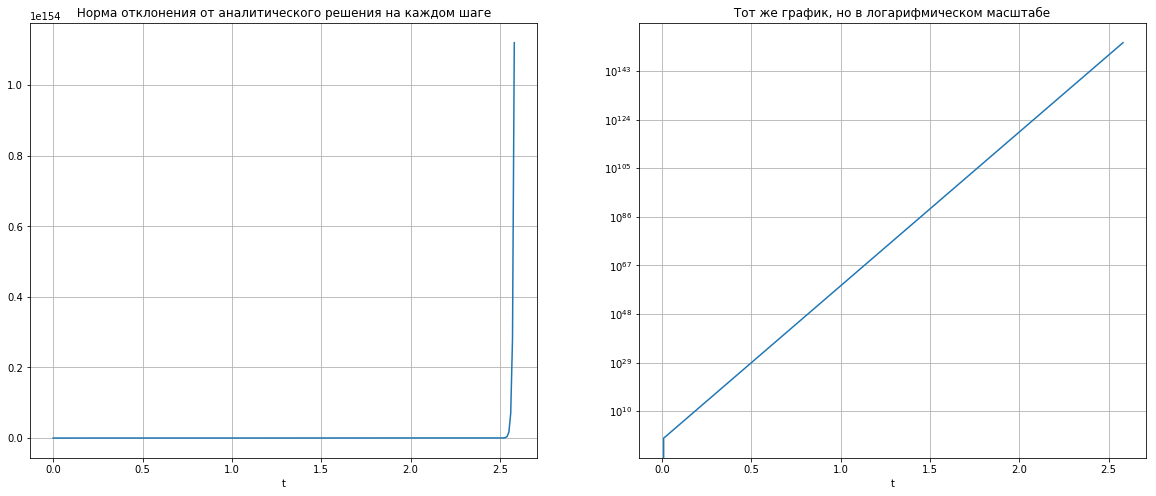

In [32]:
# Сначала нужно найти точное решение. Для этого используем библиотечные функции.
from pylab import *
from scipy.linalg import *
def true_sol(A, u0, t):
    Y = u0 @ expm(A*t)
    return Y
# Немного модифицируем исходную функцию так, чтобы она выдавала не только итоговое значение, но и значаения на всём интервале t

def general_euler_solve_mod(A, u0, T, dt):
    
    num_steps = int(T/dt)
    tt = np.arange(num_steps+1)*dt
    y = np.empty(((np.shape(u0))[0], num_steps+1))
    y[:, 0] = u0
    for k in range(num_steps):
        y[:, k+1] = y[:, k] + A @ y[:,k]*dt
    return  y

T = 10
dt = 0.01
num_steps = int(T/dt)
dev = np.empty(num_steps)
t_lst = dt*np.arange(num_steps)
for t in range(num_steps):
    dev[t] = np.linalg.norm(true_sol(A, u0, dt*t) - general_euler_solve_mod(A, u0, 10, 0.01)[:, t])

plt.figure(figsize=(20, 8))
plt.subplot(121)

plt.title(' Норма отклонения от аналитического решения на каждом шаге ')
plt.plot(t_lst, dev)
plt.grid(True)
plt.xlabel('t')

plt.subplot(122)
plt.title(' Тот же график, но в логарифмическом масштабе ')
plt.semilogy(t_lst, dev)
plt.grid(True)
plt.xlabel('t')

Теперь точно очевидно, что решение расходится, то есть оно неустойчиво при заданном значении $\tau = 0.01$.
Далее найдём собственные векторы матрицы $A$.

In [33]:
# Найдём собственные значения матрицы А
np.linalg.eigvals(A)

array([  -9.34647667, -499.65352333])

Из лекций известно, что система уравнений будет жёсткой, если для собственных значений матрицы $A$ выполняется соотношение $ s=\frac{max_k|Re\lambda_k|}{min_k|Re\lambda_k|}\gg1$. 
В нашей задаче $s\approx 53$, то есть система является жёсткой.

### Test II.2

Implement the $\textit{implicit}$ Euler's scheme for a system of first-order equations with constant coefficients. Note that at each time step you need to solve a system of linear algebraic equations, use `np.linalg.solve` for that.

Use this routine to solve the system from Test II.1 at the same step size $\tau=0.01$. Compare solutions obtained by an explicit and an implicit Euler's methods.

(20% of the grade)

In [34]:
# Сначала создадим функцию, решающую систему неявным методом Эйлера
def general_imp_euler_solve(A, u0, T, dt):
    
    num_steps = int(T/dt)
    tt = np.arange(num_steps+1)*dt
    y = np.empty(((np.shape(u0))[0], num_steps+1))
    y[:, 0] = u0
    for k in range(num_steps):
        y[:, k+1] = np.linalg.solve((np.eye((np.shape(u0))[0]) - dt*A), y[:, k])
    return tt, y[:, num_steps]

Теперь протестируем новую функцию на системе уравнений из Test II.1 .

In [35]:
u0 = np.array([1, 0])
A = np.array(([-10, 10], [32, -499]))

print(general_imp_euler_solve(A, u0, 10, 0.01))

(array([ 0.  ,  0.01,  0.02, ...,  9.98,  9.99, 10.  ]), array([1.56540548e-39, 1.02302900e-40]))


Результат обнадёживает, численное решение сходится, но для верности проанализируем поведение решения графически.

Text(0.5, 0, 't')

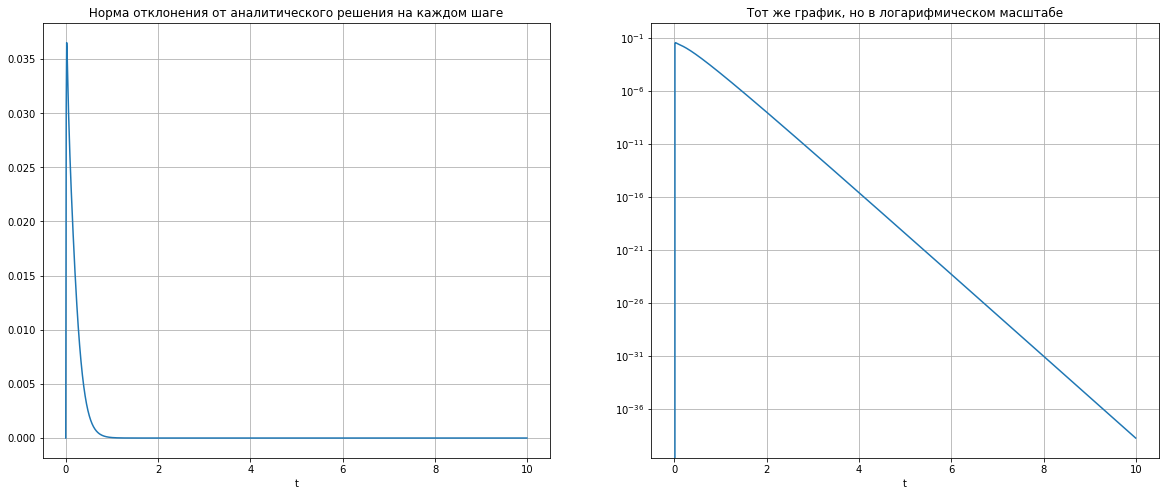

In [36]:
# Немного модифицируем исходную функцию так, чтобы она выдавала не только итоговое значение, но и значаения на всём интервале t

def general_imp_euler_solve_mod(A, u0, T, dt):
    
    num_steps = int(T/dt)
    tt = np.arange(num_steps+1)*dt
    y = np.empty(((np.shape(u0))[0], num_steps+1))
    y[:, 0] = u0
    for k in range(num_steps):
        y[:, k+1] = np.linalg.solve((np.eye((np.shape(u0))[0]) - dt*A), y[:, k])
    return  y

T = 10
dt = 0.01
num_steps = int(T/dt)
dev = np.empty(num_steps)
t_lst = dt*np.arange(num_steps)
for t in range(num_steps):
    dev[t] = np.linalg.norm(true_sol(A, u0, dt*t) - general_imp_euler_solve_mod(A, u0, 10, 0.01)[:, t])

plt.figure(figsize=(20, 8))
plt.subplot(121)

plt.title(' Норма отклонения от аналитического решения на каждом шаге ')
plt.plot(t_lst, dev)
plt.grid(True)
plt.xlabel('t')

plt.subplot(122)
plt.title(' Тот же график, но в логарифмическом масштабе ')
plt.semilogy(t_lst, dev)
plt.grid(True)
plt.xlabel('t')

Сравнение явной и неявной схем Эйлера: при заданном значении шага сетки явная схема Эйлера расходится, неявная сходится к точному решению.

# III. Second order ODEs.

Consider a second order ODE, which describes a oscillating pendulum

$$
\frac{d^2 u}{dt^2} + \omega^2 u = 0
$$

Convert this second order ODE into a system of two first order ODEs.

### Test III.1 

Solve this system of equations using the explicit Euler's method over a time interval which includes at least several periods. We know that the equation of motion conserves energy, so that

$$
E = \frac{u'^2}{2} + \frac{\omega^2 u^2}{2}
$$

should remain constant. Plot the dependence of $E$ on time for your numeric solution. Use several values of the time step. Does your discretized scheme conserve energy?

(20% of the grade)

Введём новую переменную $v=\frac{du}{dt}$, тогда исходное уравнение перепишется в виде системы 
$$
\frac{d}{dt}\begin{pmatrix} u\\ v \end{pmatrix} = \begin{pmatrix} 0 & 1\\ -\omega^2& 0 \end{pmatrix} \begin{pmatrix} u\\ v \end{pmatrix}
$$
Таким образом, обозначая $\mathbf{y} = \begin{pmatrix} u\\ v \end{pmatrix}$ и $A = \begin{pmatrix} 0 & 1\\ -\omega^2& 0 \end{pmatrix} $, перейдём к системе уравнений первого порядка:
$$
\frac{d \mathbf{y} }{d t} = A \mathbf{y}
$$

Решение при ширине шага = 0.01 :
координата u 1.6375209939437407
скорость v 0.05314023674241841


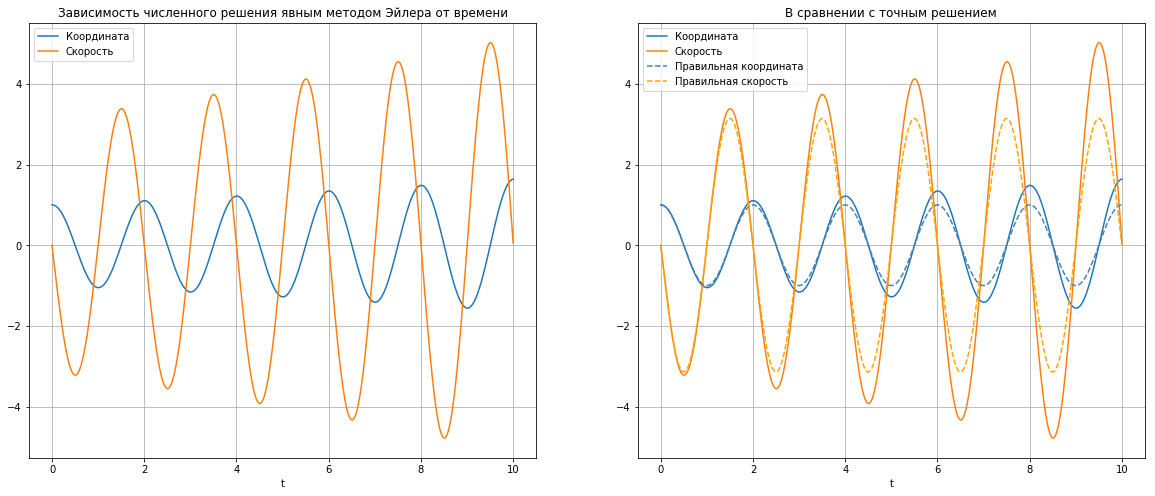

In [37]:
# Выберем частоту
w_2 = (np.pi)**2
dt = 0.01
T = 10
u0 = np.array([1, 0]) # Нулевая скорость, максимальное отклонение
A = np.array(([0, 1], [-w_2, 0]))
# Т = 5 периодов
num_steps = int(T/dt)
print('Решение при ширине шага =',dt, ':') 
print('координата u', general_euler_solve_mod(A, u0, T, dt)[0,num_steps ])
print('скорость v', general_euler_solve_mod(A, u0, T, dt)[1,num_steps])
#Построим зависимость решения от времени

t_lst = dt*np.arange(num_steps+1)
u_t = general_euler_solve_mod(A, u0, T, dt)[0]
v_t = general_euler_solve_mod(A, u0, T, dt)[1]
# Зададим аналитическое решение для сравнения дальше
uu_t = cos(np.pi*t_lst)
vv_t = -np.pi*sin(np.pi*t_lst)

plt.figure(figsize=(20, 8))
plt.subplot(121)

plt.title('Зависимость численного решения явным методом Эйлера от времени')
plt.plot(t_lst, u_t, label = 'Координата')
plt.plot(t_lst, v_t, label = 'Скорость')
plt.grid(True)
plt.legend(loc='best')
plt.xlabel('t')
plt.subplot(122)

plt.title('В сравнении с точным решением')
plt.plot(t_lst, u_t, label = 'Координата')
plt.plot(t_lst, v_t, label = 'Скорость')
plt.plot(t_lst, uu_t,   '--', c = 'steelblue',label = 'Правильная координата')
plt.plot(t_lst, vv_t, '--', c = 'orange', label = 'Правильная скорость')
plt.grid(True)
plt.xlabel('t')
plt.legend(loc='best')


Видно, что амплитуды скорости и координаты увеличиваются со временем, что намекает на увеличение энергии в системе. Проверим это, построив график зависимости полной энергии системы от времени.

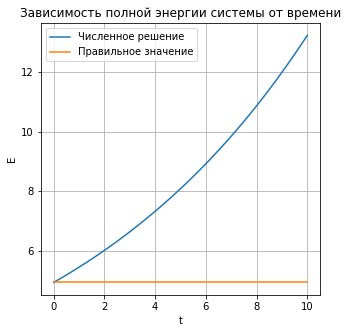

In [38]:
E = (v_t**2 + (np.pi*u_t)**2)/2
EE = (vv_t**2 + (np.pi*uu_t)**2)/2
plt.figure(figsize=(5, 5))
plt.title('Зависимость полной энергии системы от времени')

plt.plot(t_lst, E, label ='Численное решение')
plt.plot(t_lst, EE, label ='Правильное значение')
plt.grid(True)
plt.xlabel('t')
plt.ylabel('E')
plt.legend(loc='best')

Энергия не сохраняется. Построим ещё несколько зависимостей для разных значений ширины шага сетки времени.

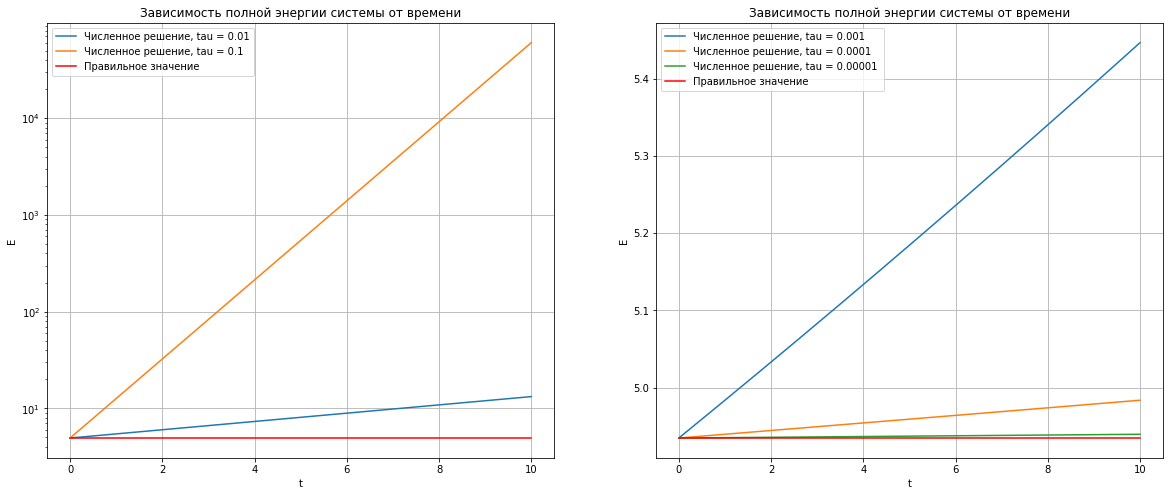

In [39]:
w_2 = (np.pi)**2
T = 10
u0 = np.array([1, 0]) # Нулевая скорость, максимальное отклонение
A = np.array(([0, 1], [-w_2, 0]))
# Т = 5 периодов
dt = 0.01

num_steps = int(T/dt)
t_lst = dt*np.arange(num_steps+1)
u_t = general_euler_solve_mod(A, u0, T, dt)[0]
v_t = general_euler_solve_mod(A, u0, T, dt)[1]
# Зададим аналитическое решение для сравнения дальше
uu_t = cos(np.pi*t_lst)
vv_t = -np.pi*sin(np.pi*t_lst)
E = (v_t**2 + (np.pi*u_t)**2)/2
EE = (vv_t**2 + (np.pi*uu_t)**2)/2
#-----------------------------------------------------------------------------------#
dt = 0.001

num_steps = int(T/dt)
t1_lst = dt*np.arange(num_steps+1)
u1_t = general_euler_solve_mod(A, u0, T, dt)[0]
v1_t = general_euler_solve_mod(A, u0, T, dt)[1]
E1 = (v1_t**2 + (np.pi*u1_t)**2)/2
#-----------------------------------------------------------------------------------#

dt = 0.0001

num_steps = int(T/dt)
t2_lst = dt*np.arange(num_steps+1)
u2_t = general_euler_solve_mod(A, u0, T, dt)[0]
v2_t = general_euler_solve_mod(A, u0, T, dt)[1]
E2 = (v2_t**2 + (np.pi*u2_t)**2)/2
#-----------------------------------------------------------------------------------#

dt = 0.00001

num_steps = int(T/dt)
t3_lst = dt*np.arange(num_steps+1)
u3_t = general_euler_solve_mod(A, u0, T, dt)[0]
v3_t = general_euler_solve_mod(A, u0, T, dt)[1]
E3 = (v3_t**2 + (np.pi*u3_t)**2)/2
#-----------------------------------------------------------------------------------#
dt = 0.1

num_steps = int(T/dt)
t0_lst = dt*np.arange(num_steps+1)
u0_t = general_euler_solve_mod(A, u0, T, dt)[0]
v0_t = general_euler_solve_mod(A, u0, T, dt)[1]
E0 = (v0_t**2 + (np.pi*u0_t)**2)/2
#-----------------------------------------------------------------------------------#
plt.figure(figsize=(20, 8))
plt.subplot(121)
plt.title('Зависимость полной энергии системы от времени')

plt.semilogy(t_lst, E, label ='Численное решение, tau = 0.01')
plt.semilogy(t0_lst, E0, label ='Численное решение, tau = 0.1')
plt.plot(t_lst, EE, c = 'r', label ='Правильное значение')
plt.xlabel('t')
plt.ylabel('E')
plt.grid(True)
plt.legend(loc='best')

plt.subplot(122)
plt.title('Зависимость полной энергии системы от времени')
plt.plot(t1_lst, E1,  label ='Численное решение, tau = 0.001 ')
plt.plot(t2_lst, E2, label ='Численное решение, tau = 0.0001 ')
plt.plot(t3_lst, E3, label ='Численное решение, tau = 0.00001 ')
plt.plot(t_lst, EE, c = 'r', label ='Правильное значение')
plt.xlabel('t')
plt.ylabel('E')
plt.grid(True)
plt.legend(loc='best')


Теперь можно с уверенностью сказать, что реальзованные схемы не сохраняют энергию системы.

### Test III.2

Implement the 2nd order Runge-Kutta scheme. Use it to solve the same equation with same time steps. Compare solutions produced by the RK method and the Euler's method at the same values of the time step. Check conservation of energy. Discuss.

(20% of the grade)

In [40]:
def general_RK_mod(A, u0, T, dt):
    
    num_steps = int(T/dt)
    tt = np.arange(num_steps+1)*dt
    y = np.empty(((np.shape(u0))[0], num_steps+1))
    y_2 = np.empty(((np.shape(u0))[0], num_steps+1))
    y[:, 0] = u0
    y_2[:, 0] = u0
    for k in range(num_steps):
        y_2[:, k+1] = dt/2*A @ y[:,k] + y[:,k] # Считаем промежуточный шаг
        y[:,k+1] = dt*A @ y_2[:, k+1] + y[:, k]
    return  y

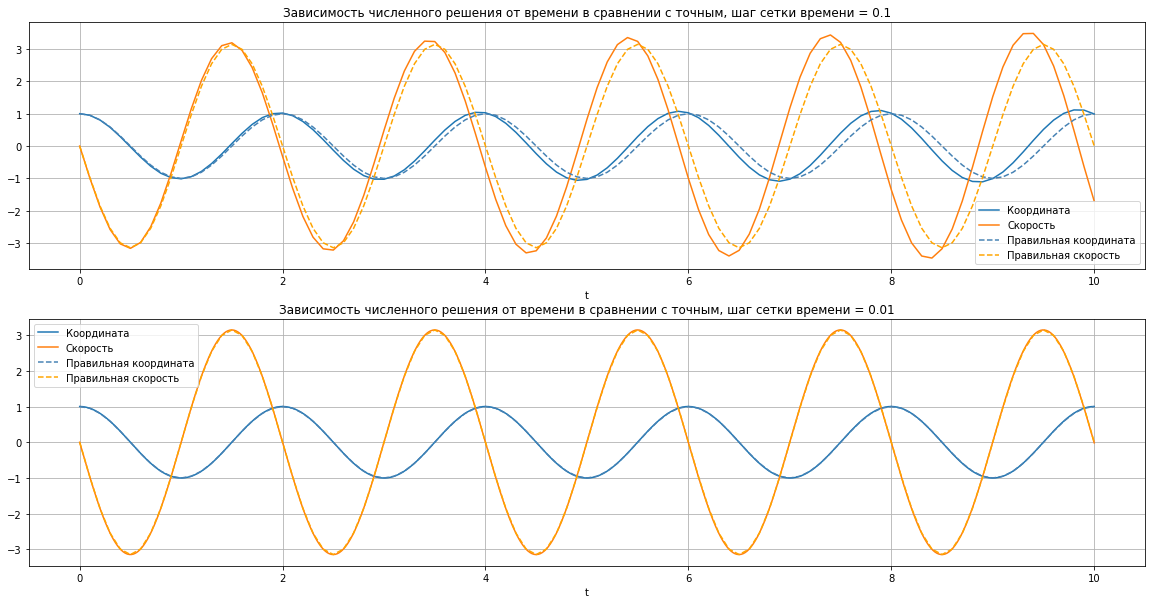

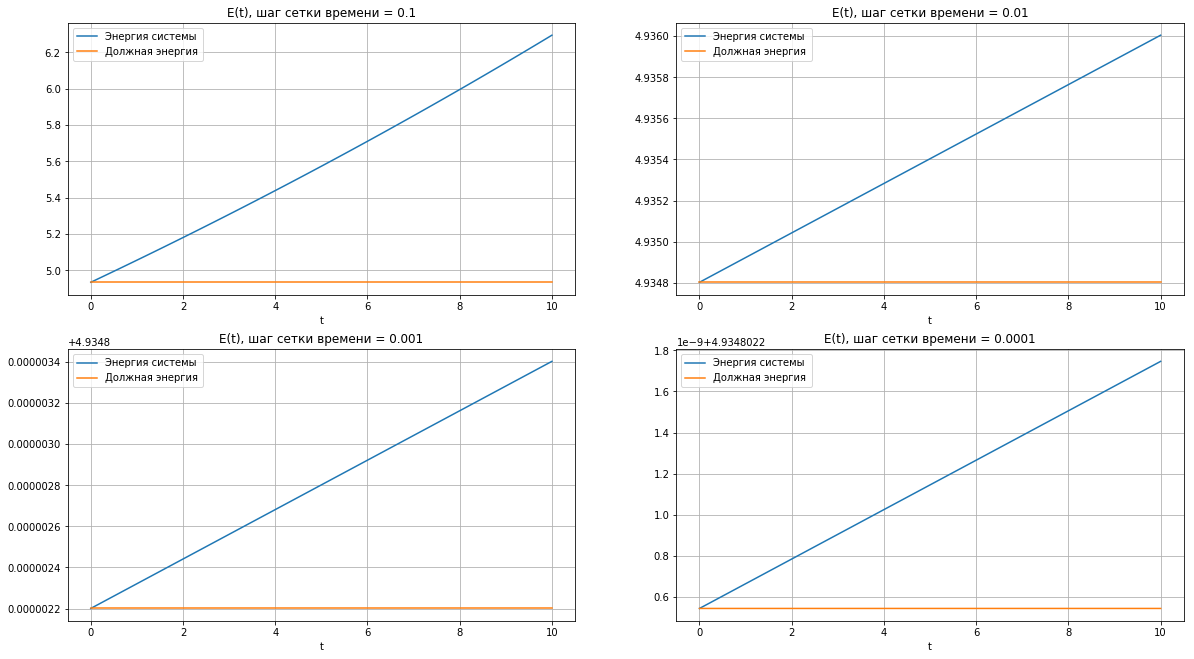

In [41]:
# Выберем частоту
w_2 = (np.pi)**2
u0 = np.array([1, 0]) # Нулевая скорость, максимальное отклонение
A = np.array(([0, 1], [-w_2, 0]))
# Т = 5 периодов

dt = 0.1
T = 10
num_steps = int(T/dt)

t1_lst = dt*np.arange(num_steps+1)
u1_t = general_RK_mod(A, u0, T, dt)[0]
v1_t = general_RK_mod(A, u0, T, dt)[1]
# Зададим аналитическое решение для сравнения дальше
uu_t = cos(np.pi*t1_lst)
vv_t = -np.pi*sin(np.pi*t1_lst)
E1 = (v1_t**2 + (np.pi*u1_t)**2)/2
EE = (vv_t**2 + (np.pi*uu_t)**2)/2

plt.figure(figsize=(20, 10))
plt.subplot(211)
plt.title('Зависимость численного решения от времени в сравнении с точным, шаг сетки времени = 0.1')
plt.plot(t1_lst, u1_t, label = 'Координата')
plt.plot(t1_lst, v1_t, label = 'Скорость')
plt.plot(t1_lst, uu_t,   '--', c = 'steelblue',label = 'Правильная координата')
plt.plot(t1_lst, vv_t, '--', c = 'orange', label = 'Правильная скорость')
plt.grid(True)
plt.xlabel('t')
plt.legend(loc='best')
#----------------------------------------------#
dt = 0.01
num_steps = int(T/dt)

t2_lst = dt*np.arange(num_steps+1)
u2_t = general_RK_mod(A, u0, T, dt)[0]
v2_t = general_RK_mod(A, u0, T, dt)[1]
E2 = (v2_t**2 + (np.pi*u2_t)**2)/2

dt = 0.001
num_steps = int(T/dt)

t3_lst = dt*np.arange(num_steps+1)
u3_t = general_RK_mod(A, u0, T, dt)[0]
v3_t = general_RK_mod(A, u0, T, dt)[1]
E3 = (v3_t**2 + (np.pi*u3_t)**2)/2

dt = 0.0001
num_steps = int(T/dt)

t4_lst = dt*np.arange(num_steps+1)
u4_t = general_RK_mod(A, u0, T, dt)[0]
v4_t = general_RK_mod(A, u0, T, dt)[1]
E4 = (v4_t**2 + (np.pi*u4_t)**2)/2

plt.subplot(212)
plt.title('Зависимость численного решения от времени в сравнении с точным, шаг сетки времени = 0.01')
plt.plot(t2_lst, u2_t, label = 'Координата')
plt.plot(t2_lst, v2_t, label = 'Скорость')
plt.plot(t1_lst, uu_t,   '--', c = 'steelblue',label = 'Правильная координата')
plt.plot(t1_lst, vv_t, '--', c = 'orange', label = 'Правильная скорость')
plt.grid(True)
plt.xlabel('t')
plt.legend(loc='best')

plt.figure(figsize=(20, 11))
plt.subplot(221)
plt.title('E(t), шаг сетки времени = 0.1')
plt.plot(t1_lst, E1, label = 'Энергия системы ')
plt.plot(t1_lst, EE, label = 'Должная энергия')
plt.grid(True)
plt.xlabel('t')
plt.legend(loc='best')

plt.subplot(222)
plt.title('E(t), шаг сетки времени = 0.01')
plt.plot(t2_lst, E2, label = 'Энергия системы ')
plt.plot(t1_lst, EE, label = 'Должная энергия')
plt.grid(True)
plt.xlabel('t')
plt.legend(loc='best')

plt.subplot(223)
plt.title('E(t), шаг сетки времени = 0.001')
plt.plot(t3_lst, E3, label = 'Энергия системы ')
plt.plot(t1_lst, EE, label = 'Должная энергия')
plt.grid(True)
plt.xlabel('t')
plt.legend(loc='best')

plt.subplot(224)
plt.title('E(t), шаг сетки времени = 0.0001')
plt.plot(t4_lst, E4, label = 'Энергия системы ')
plt.plot(t1_lst, EE, label = 'Должная энергия')
plt.grid(True)
plt.xlabel('t')
plt.legend(loc='best')


#--------------------------------------------------------------------------------------------------------------#


Заметим, что заметные отклонения от точного решения появляются только при увеличении шага в 10 раз! (В сравнении с методом Эйлера)
Построив зависимость энергии от времени, можно увидеть, что энергия не сохраняется, однако (при достаточно малом шаге) меняется пренебрежимо мало (по сравнению с изменением энергии в методе Эйлера и по сравнению с истинным значением энергии системы).

Необходимо сравнить результаты работы двух методов...Для этого построим модули отклонения каждого параметра от его точного значения.

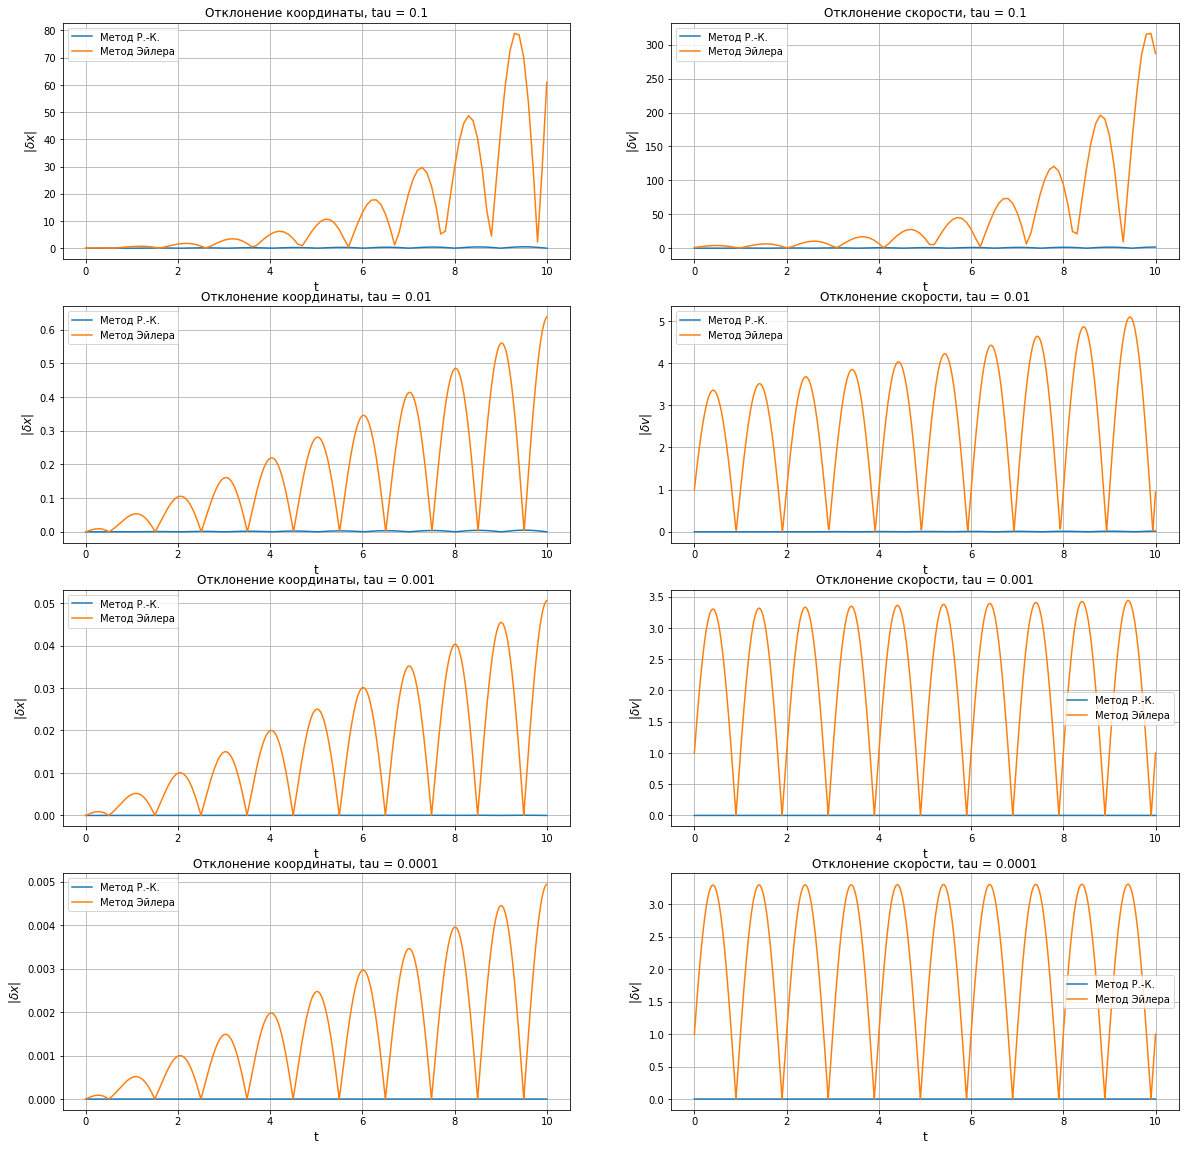

In [42]:
plt.figure(figsize=(20, 20))
T = 10 

dt = 0.1
num_steps = int(T/dt)

t1_lst = dt*np.arange(num_steps+1)
u1_t = general_RK_mod(A, u0, T, dt)[0]
v1_t = general_RK_mod(A, u0, T, dt)[1]

f1_t = general_euler_solve_mod(A, u0, T, dt)[0]
g1_t = general_euler_solve_mod(A, u0, T, dt)[1]

uu1_t = cos(np.pi*t1_lst)
vv1_t = -np.pi*sin(np.pi*t1_lst)
du1 = abs(u1_t - uu1_t)
dv1 = abs(v1_t - vv1_t)

df1 = abs(f1_t - uu1_t)
dg1 = abs(g1_t - uu1_t)
plt.subplot(421)
plt.plot(t1_lst, du1, label = 'Метод Р.-К.')
plt.plot(t1_lst, df1, label = 'Метод Эйлера')
plt.grid(True)
plt.xlabel('t', fontsize = 12)
plt.ylabel('$|\delta x|$', fontsize = 12)
plt.title('Отклонение координаты, tau = 0.1')
plt.legend(loc='best')
plt.subplot(422)
plt.plot(t1_lst, dv1, label = 'Метод Р.-К.')
plt.plot(t1_lst, dg1, label = 'Метод Эйлера')
plt.grid(True)
plt.xlabel('t', fontsize = 12)
plt.ylabel('$|\delta v|$', fontsize = 12)
plt.title('Отклонение скорости, tau = 0.1')
plt.legend(loc='best')
#--------------------------------------------------------------#

dt = 0.01
num_steps = int(T/dt)

t2_lst = dt*np.arange(num_steps+1)
u2_t = general_RK_mod(A, u0, T, dt)[0]
v2_t = general_RK_mod(A, u0, T, dt)[1]

f2_t = general_euler_solve_mod(A, u0, T, dt)[0]
g2_t = general_euler_solve_mod(A, u0, T, dt)[1]

uu2_t = cos(np.pi*t2_lst)
vv2_t = -np.pi*sin(np.pi*t2_lst)
du2 = abs(u2_t - uu2_t)
dv2 = abs(v2_t - vv2_t)

df2 = abs(f2_t - uu2_t)
dg2 = abs(g2_t - uu2_t)
plt.subplot(423)
plt.plot(t2_lst, du2, label = 'Метод Р.-К.')
plt.plot(t2_lst, df2, label = 'Метод Эйлера')
plt.grid(True)
plt.xlabel('t', fontsize = 12)
plt.ylabel('$|\delta x|$', fontsize = 12)
plt.title('Отклонение координаты, tau = 0.01')
plt.legend(loc='best')
plt.subplot(424)
plt.plot(t2_lst, dv2, label = 'Метод Р.-К.')
plt.plot(t2_lst, dg2, label = 'Метод Эйлера')
plt.grid(True)
plt.xlabel('t', fontsize = 12)
plt.ylabel('$|\delta v|$', fontsize = 12)
plt.title('Отклонение скорости, tau = 0.01')
plt.legend(loc='best')
#--------------------------------------------------------------#

dt = 0.001
num_steps = int(T/dt)

t3_lst = dt*np.arange(num_steps+1)
u3_t = general_RK_mod(A, u0, T, dt)[0]
v3_t = general_RK_mod(A, u0, T, dt)[1]

f3_t = general_euler_solve_mod(A, u0, T, dt)[0]
g3_t = general_euler_solve_mod(A, u0, T, dt)[1]

uu3_t = cos(np.pi*t3_lst)
vv3_t = -np.pi*sin(np.pi*t3_lst)
du3 = abs(u3_t - uu3_t)
dv3 = abs(v3_t - vv3_t)

df3 = abs(f3_t - uu3_t)
dg3 = abs(g3_t - uu3_t)
plt.subplot(425)
plt.plot(t3_lst, du3, label = 'Метод Р.-К.')
plt.plot(t3_lst, df3, label = 'Метод Эйлера')
plt.grid(True)
plt.xlabel('t', fontsize = 12)
plt.ylabel('$|\delta x|$', fontsize = 12)
plt.title('Отклонение координаты, tau = 0.001')
plt.legend(loc='best')
plt.subplot(426)
plt.plot(t3_lst, dv3, label = 'Метод Р.-К.')
plt.plot(t3_lst, dg3, label = 'Метод Эйлера')
plt.grid(True)
plt.xlabel('t', fontsize = 12)
plt.ylabel('$|\delta v|$', fontsize = 12)
plt.title('Отклонение скорости, tau = 0.001')
plt.legend(loc='best')
#--------------------------------------------------------------#
dt = 0.0001
T =10
num_steps = int(T/dt)

t4_lst = dt*np.arange(num_steps+1)
u4_t = general_RK_mod(A, u0, T, dt)[0]
v4_t = general_RK_mod(A, u0, T, dt)[1]

f4_t = general_euler_solve_mod(A, u0, T, dt)[0]
g4_t = general_euler_solve_mod(A, u0, T, dt)[1]

uu4_t = cos(np.pi*t4_lst)
vv4_t = -np.pi*sin(np.pi*t4_lst)
du4 = abs(u4_t - uu4_t)
dv4 = abs(v4_t - vv4_t)

df4 = abs(f4_t - uu4_t)
dg4 = abs(g4_t - uu4_t)
plt.subplot(427)
plt.plot(t4_lst, du4, label = 'Метод Р.-К.')
plt.plot(t4_lst, df4, label = 'Метод Эйлера')
plt.grid(True)
plt.xlabel('t', fontsize = 12)
plt.ylabel('$|\delta x|$', fontsize = 12)
plt.title('Отклонение координаты, tau = 0.0001')
plt.legend(loc='best')
plt.subplot(428)
plt.plot(t4_lst, dv4, label = 'Метод Р.-К.')
plt.plot(t4_lst, dg4, label = 'Метод Эйлера')
plt.grid(True)
plt.title('Отклонение скорости, tau = 0.0001')
plt.xlabel('t', fontsize = 12)
plt.ylabel('$|\delta v|$', fontsize = 12)
plt.legend(loc='best')
#--------------------------------------------------------------#



Я решила не строить сравнительные графики для $\tau = 0.00001$, так как они крайне мало отличается от предыдущего.

Подводя итог, можно сказать, что метод Р.-К. позволяет решать системы дифференциальных уравнений сущесвенно точнее, чем метод Эйлера.

### Дополнительно реализуем метод Р.-К. четвёртого порядка

In [43]:
def general_RK4_mod(A, u0, T, dt):
    
    num_steps = int(T/dt)
    
    y = np.zeros((shape(u0)[0], num_steps+1))
    k1 =np.zeros((shape(u0)[0], num_steps+1))
    k2 =np.zeros((shape(u0)[0], num_steps+1))
    k3 =np.zeros((shape(u0)[0], num_steps+1))
    k4 =np.zeros((shape(u0)[0], num_steps+1))
    y[:, 0] = u0

    for k in range(num_steps):
        k1[:, k]= A @ (y[:,k])
        k2[:, k]= A @ (y[:, k] + k1[:, k]*dt/2)
        k3[:, k] = A @ (y[:, k] + k2[:, k]*dt/2)
        k4[:, k] = A @ (y[:, k] + k3[:, k]*dt)
        y[:, k+1] =  y[:, k] + dt*(k1[:, k] + 2*k2[:, k]+ 2*k3[:, k]+ k4[:, k])/6

    return  y

Text(0.5, 1.0, 'Сравнение методов Р.-К. второго и четвёртого порядков, tau = 0.1')

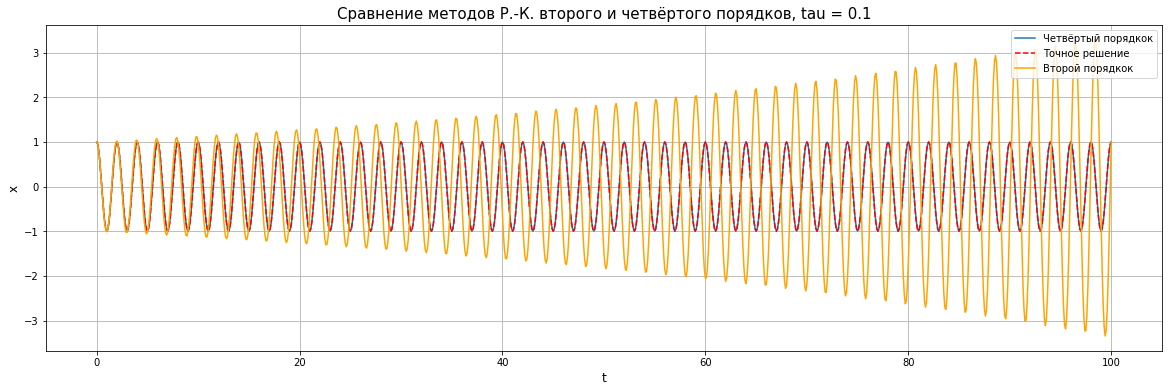

In [44]:
w_2 = (np.pi)**2
u0 = np.array([1, 0]) # Нулевая скорость, максимальное отклонение
A = np.array(([0, 1], [-w_2, 0]))
T = 100

dt = 0.1 # На такой ширине шага лучше видно преимущества метода четвёртого порядка
         # Если уменьшить шаг, то хорошо приближать точное решение будут оба метода
num_steps = int(T/dt)
plt.figure(figsize=(20, 6))
t4_lst = dt*np.arange(num_steps+1)
UU_t = cos(np.pi*t4_lst)
U_t = general_RK_mod(A, u0, T, dt)[0]
u4_t = general_RK4_mod(A, u0, T, dt)[0]
plt.plot(t4_lst, u4_t, label='Четвёртый порядкок')
plt.plot(t4_lst,  UU_t,  '--',c = 'red', label='Точное решение') 
plt.plot(t4_lst, U_t, c = 'orange', label='Второй порядкок') 
plt.xlabel('t', fontsize = 12)
plt.ylabel('x', fontsize = 12)
plt.grid()
plt.legend(loc = True)
plt.title('Сравнение методов Р.-К. второго и четвёртого порядков, tau = 0.1', fontsize = 15)

Если уменьшить шаг, то различия между результатами работы методов станут менее заметными...

Text(0.5, 1.0, 'Сравнение методов Р.-К. второго и четвёртого порядков, tau = 0.01')

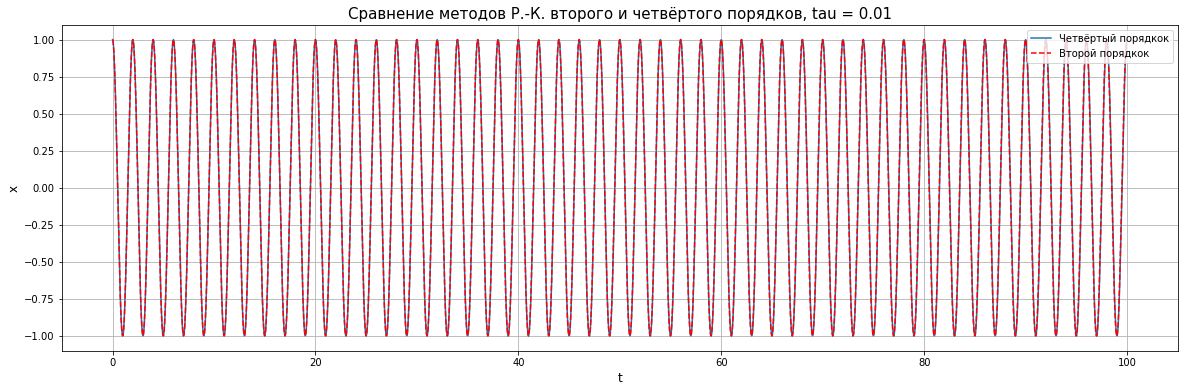

In [45]:
dt = 0.01 
num_steps = int(T/dt)
plt.figure(figsize=(20, 6))
t4_lst = dt*np.arange(num_steps+1)

UU_t = cos(np.pi*t4_lst)
VV_t = -np.pi*sin(np.pi*t4_lst)

U_t = general_RK_mod(A, u0, T, dt)[0]
V_t = general_RK_mod(A, u0, T, dt)[1]
u4_t = general_RK4_mod(A, u0, T, dt)[0]
v4_t = general_RK4_mod(A, u0, T, dt)[1]

plt.plot(t4_lst, u4_t, label='Четвёртый порядкок')
#plt.plot(t4_lst,  UU_t,  '--',c = 'red', label='Точное решение') 
plt.plot(t4_lst, U_t, '--', c = 'red', label='Второй порядкок') 
plt.grid()
plt.legend(loc = True)
plt.xlabel('t', fontsize = 12)
plt.ylabel('x', fontsize = 12)
plt.title('Сравнение методов Р.-К. второго и четвёртого порядков, tau = 0.01', fontsize = 15)

Посмотрим, что происходит с полной энергией системы:

Text(0, 0.5, 'E')

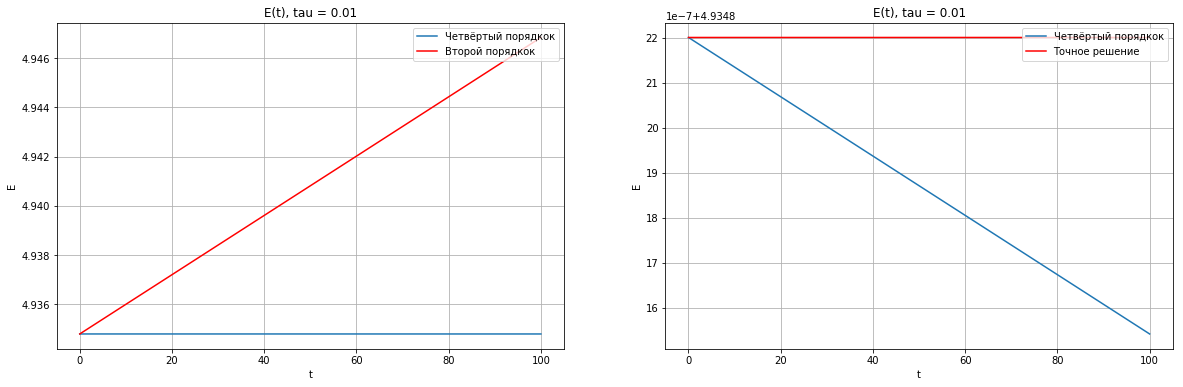

In [46]:
E4 = (v4_t**2 + (np.pi*u4_t)**2)/2
E2 = (V_t**2 + (np.pi*U_t)**2)/2
E0 = (VV_t**2 + (np.pi*UU_t)**2)/2

plt.figure(figsize=(20, 6))

plt.subplot(121)
plt.plot(t4_lst, E4, label='Четвёртый порядкок')
plt.plot(t4_lst, E2,  c = 'red', label='Второй порядкок') 
plt.grid()
plt.xlabel('t')
plt.ylabel('E')
plt.legend(loc = True)
plt.title('E(t), tau = 0.01')


plt.subplot(122)
plt.plot(t4_lst, E4, label='Четвёртый порядкок')
plt.plot(t4_lst, E0,  c = 'red', label='Точное решение') 
plt.grid()
plt.legend(loc = True)
plt.title('E(t), tau = 0.01')
plt.xlabel('t')
plt.ylabel('E')

Таким образом, оба метода не сохраняют энергию системы, однако при использовании метода четвёртого порядка отклонение от истинного значения меньше.